<a href="https://colab.research.google.com/github/foryoudrizzle14/metacode_creditcard/blob/main/metacode%20first_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print (tf.__version__)

2.15.0


In [24]:
#(1) DATA
X=[1,2,3]
Y=[1,2,3]

In [25]:
#(2) hypothesis
W = tf.Variable(tf.random.normal([1]), name='weight') # Initialize the weight W to a random normal distribution value
b = tf.Variable(tf.random.normal([1]), name='bias')   # Initialize the bias b to a random normal distribution value

In [26]:
def hypothesis(x):
  return W * x + b # 선형 회귀 모델의 가설 함수: y = Wx + b

In [27]:
def cost_fn(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))# 예측값과 실제값의 차이를 제곱하여 평균을 계산

In [38]:
optimizer = tf.optimizers.SGD(learning_rate = 0.01)

In [29]:
# 학습 함수 정의
def train():
  with tf.GradientTape() as g:
    pred = hypothesis(X)
    cost = cost_fn(pred, Y)
  gradients = g.gradient(cost, [W, b])  # 비용 함수에 대한 W와 b의 그래디언트 계산

  optimizer.apply_gradients(zip(gradients, [W, b]))  # 계산된 그래디언트를 사용하여 W와 b 업데이트

In [35]:
# 모델 학습
for step in range(2001):
  train()

  if step % 500 == 0:
    pred = hypothesis(X)
    cost = cost_fn(pred, Y)
    print("step = {}, cost = {}, W = {}, b = {}".format(step+1, cost, W.numpy(), b.numpy()))

step = 1, cost = 1.8855689631891437e-06, W = [1.0015949], b = [-0.00362546]
step = 501, cost = 1.704356122900208e-07, W = [1.0004796], b = [-0.00109007]
step = 1001, cost = 1.5565879252221748e-08, W = [1.0001452], b = [-0.00032938]
step = 1501, cost = 1.4497013589576113e-09, W = [1.0000442], b = [-0.00010074]
step = 2001, cost = 1.3801226828036306e-10, W = [1.0000138], b = [-3.0833202e-05]


In [36]:

for step in range(2001):
  train()

  if step % 500 == 0:
    pred = hypothesis(X)
    cost = cost_fn(pred, Y)
    print("step =", "%04d" % (step+1), "cost = {}, W = {}, b = {}".format(cost, W.numpy(), b.numpy()))

step = 0001 cost = 1.3708738311191127e-10, W = [1.0000138], b = [-3.077002e-05]
step = 0501 cost = 2.84228942465381e-11, W = [1.0000064], b = [-1.3641623e-05]
step = 1001 cost = 1.4120852924459637e-11, W = [1.0000046], b = [-9.510994e-06]
step = 1501 cost = 1.2278178473934531e-11, W = [1.0000043], b = [-8.612512e-06]
step = 2001 cost = 1.2278178473934531e-11, W = [1.0000043], b = [-8.612512e-06]


In [31]:
# matplotlib -> 결과 시각화
import matplotlib.pyplot as plt
import numpy as np

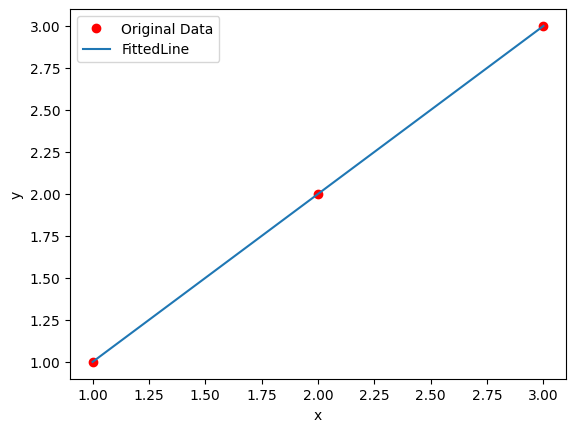

In [32]:
plt.plot(X,Y, 'ro', label = 'Original Data') # 원본 데이터 -> 빨간 점
plt.plot(X,np.array(W*Y+b), label='FittedLine') # 학습된 모델 -> 직선
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [37]:
# 새로운 입력 값에 대한 예측
x_test = [20]
x_test_predict = np.array(x_test * W + b) # 새로운 입력 값 20에 대한 예측
print('**************************')

print('if 20 appear, then correct! \n', x_test_predict) # 예측 결과 출력

**************************
if 20 appear, then correct! 
 [20.000076]
